# Data Scientist  
**NAMA : Muhammad Rafi Farhan**  
**NIM  : 202131145**  

## Latar Belakang Masalah
Kumpulan data mengacu pada klien dari distributor grosir. Mencakup pengeluaran tahunan dalam satuan moneter (m.u) untuk berbagai kategori produk.  
  
saya akan menganalisis dataset yang berisi data tentang berbagai jumlah pengeluaran tahunan pelanggan (dilaporkan dalam satuan moneter) dari beragam kategori produk untuk struktur internal. Salah satu tujuan dari proyek ini adalah untuk menjelaskan variasi dalam berbagai jenis pelanggan yang berinteraksi dengan distributor grosir, sehingga distributor mendapat wawasan tentang bagaimana cara terbaik menyusun layanan pengiriman mereka untuk memenuhi kebutuhan setiap pelanggan.
  

## DATASET
https://archive.ics.uci.edu/dataset/292/wholesale+customers

FRESH: annual spending (m.u.) on fresh products (Continuous);  
MILK: annual spending (m.u.) on milk products (Continuous);  
GROCERY: annual spending (m.u.)on grocery products (Continuous);  
FROZEN: annual spending (m.u.)on frozen products (Continuous)  
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)   
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);   
CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)  
REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)  
  
Descriptive Statistics:

	(Minimum, Maximum, Mean, Std. Deviation)
FRESH (	3, 112151, 12000.30, 12647.329)  
MILK	(55, 73498, 5796.27, 7380.377)  
GROCERY	(3, 92780, 7951.28, 9503.163)  
FROZEN	(25, 60869, 3071.93, 4854.673)  
DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)  
DELICATESSEN (3, 47943, 1524.87, 2820.106)  

REGION	Frequency  
Lisbon	77  
Oporto	47  
Other Region 	316  
Total	440  

CHANNEL	Frequency  
Horeca	298  
Retail	142  
Total	440  

## BAB 1 - Mengumpulkan data


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None) #melihat semua kolom

In [4]:
dataset = pd.read_csv('Wholesale customers data.csv') #memasukkan dataset

In [5]:
dataset #melihat/membuka dataset

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## BAB 2 – Menelaah data

In [8]:
dataset.info() #menampilkan info karakteristik data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
dataset.shape #cek dimensi dataset (440 pengamatan/customer, 8 fitur )

(440, 8)

In [10]:
dataset.head() #menampilkan kepala data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
dataset.tail() #menampilkan buntut data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [12]:
dataset.describe() #menampilkan atribut statistik

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [44]:
sns.set_style("whitegrid")

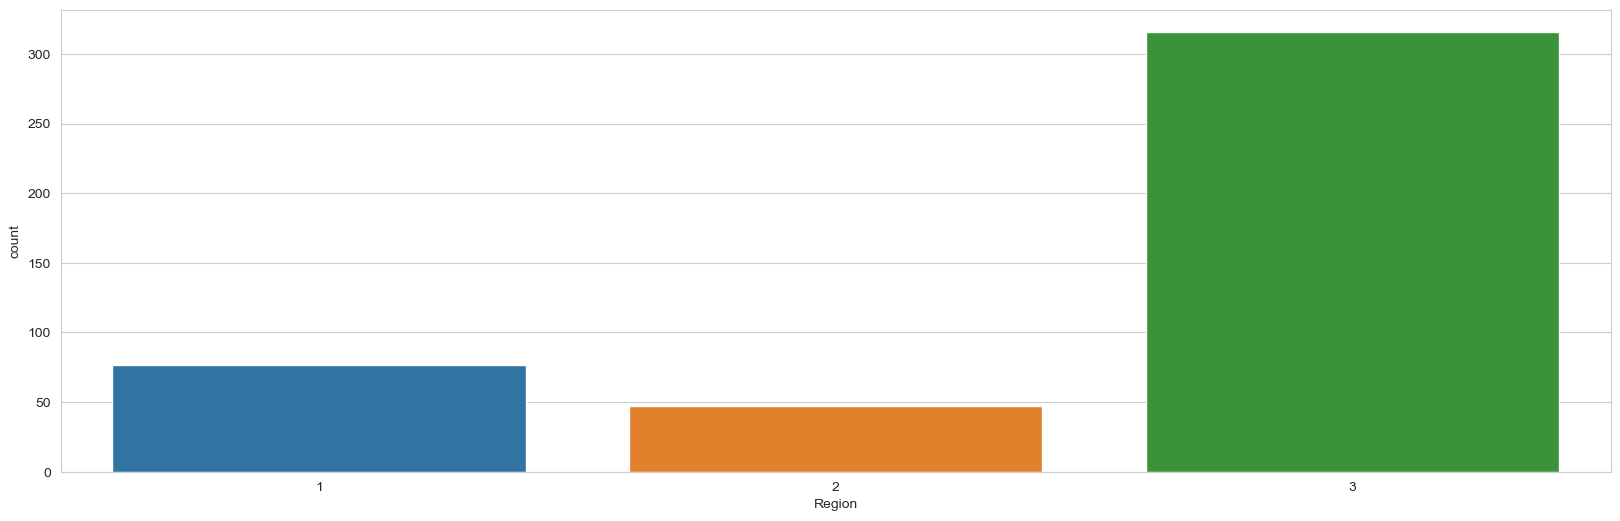

In [49]:
#menampilkan grafik region
plt.figure(figsize=(20, 6))
sns.countplot(x= 'Region', data=dataset)
plt.show()

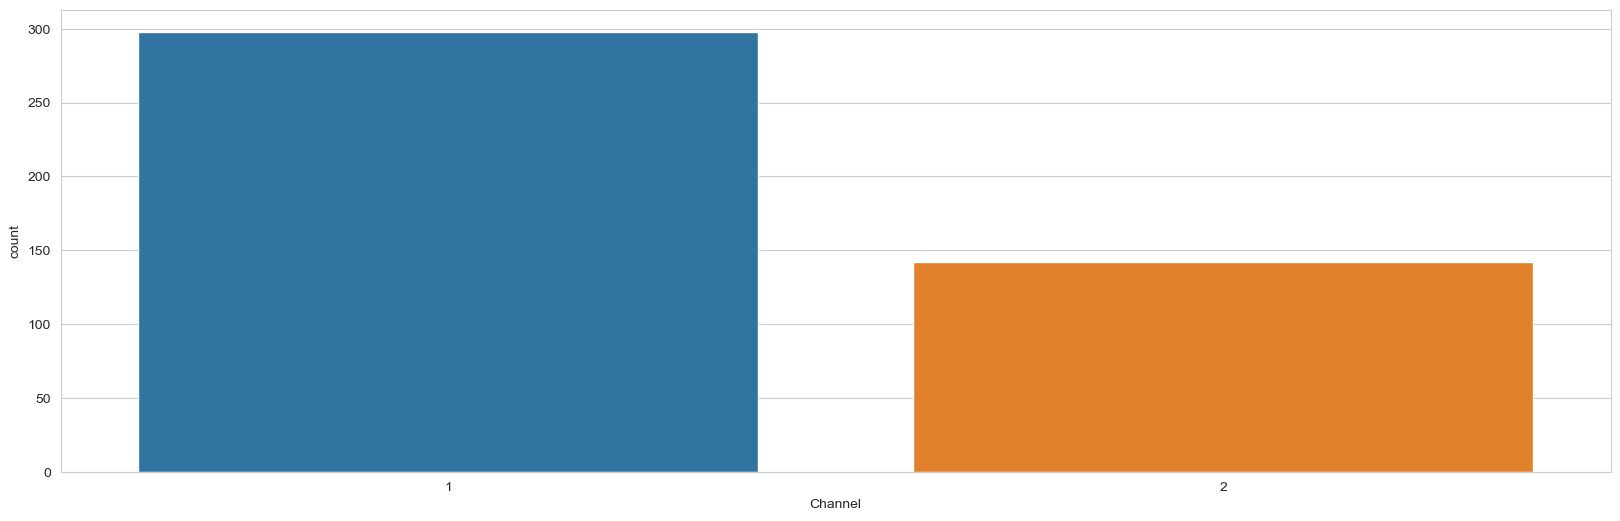

In [50]:
#menampilkan grafik channel
plt.figure(figsize=(20, 6))
sns.countplot(x= 'Channel', data=dataset)
plt.show()

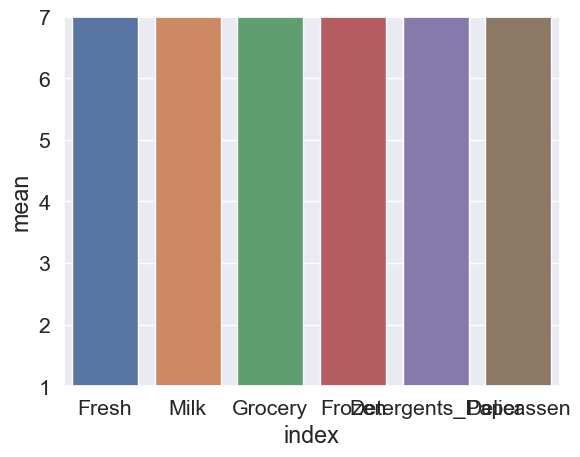

In [95]:
#menampilkan produk yg akan di clusterkan
X_wholesales = dataset.iloc[:,2:8]
wholesales_means = X_wholesales.mean(axis = 0) # (6 x 1)
wholesales_means = wholesales_means.to_frame('mean')
wholesales_means.reset_index(level=0, inplace=True)
sns.barplot(x="index", y="mean", data=wholesales_means)
plt.ylim(1,7)
plt.show()

In [90]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype : #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


Channel : [2 1]
Region : [3 1 2]
Fresh : [ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    140  42312
   7149   2101  14903   9434   7388 

Temuan:
- tidak ada data `?`

**Cek Distribusi kelas**

In [69]:
dataset['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

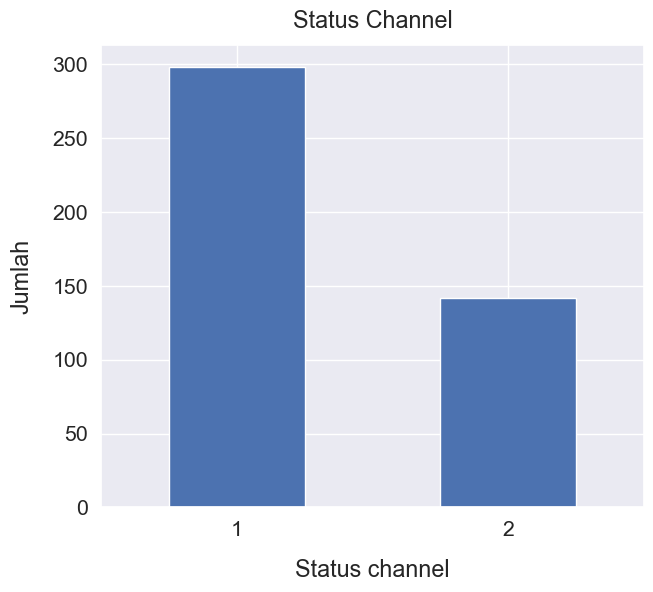

In [96]:
sns.set(font_scale=1.4)
dataset['Channel'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status channel", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Channel", y=1.02);

Temuan:
- Kelas channel 1 lebih banyak dari channel 2 (belum seimbang)

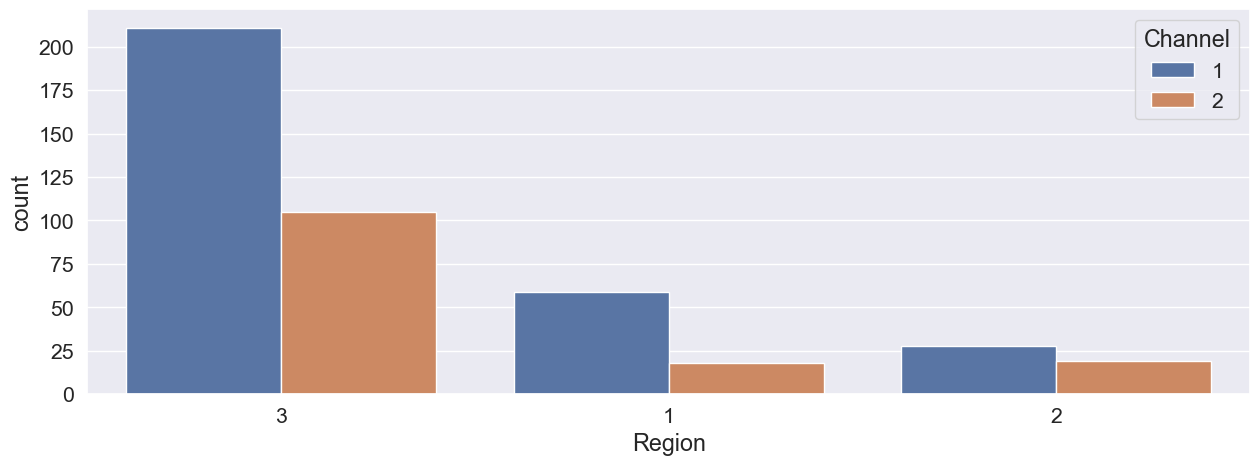

In [72]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['Region'],order=dataset['Region'].value_counts().index,hue=dataset['Channel'])
plt.show()

Temuan:
- region 3 lebih banyak channel 1
- region 2 lebih banyak channel 1
- region 1 lebih banyak channel 1

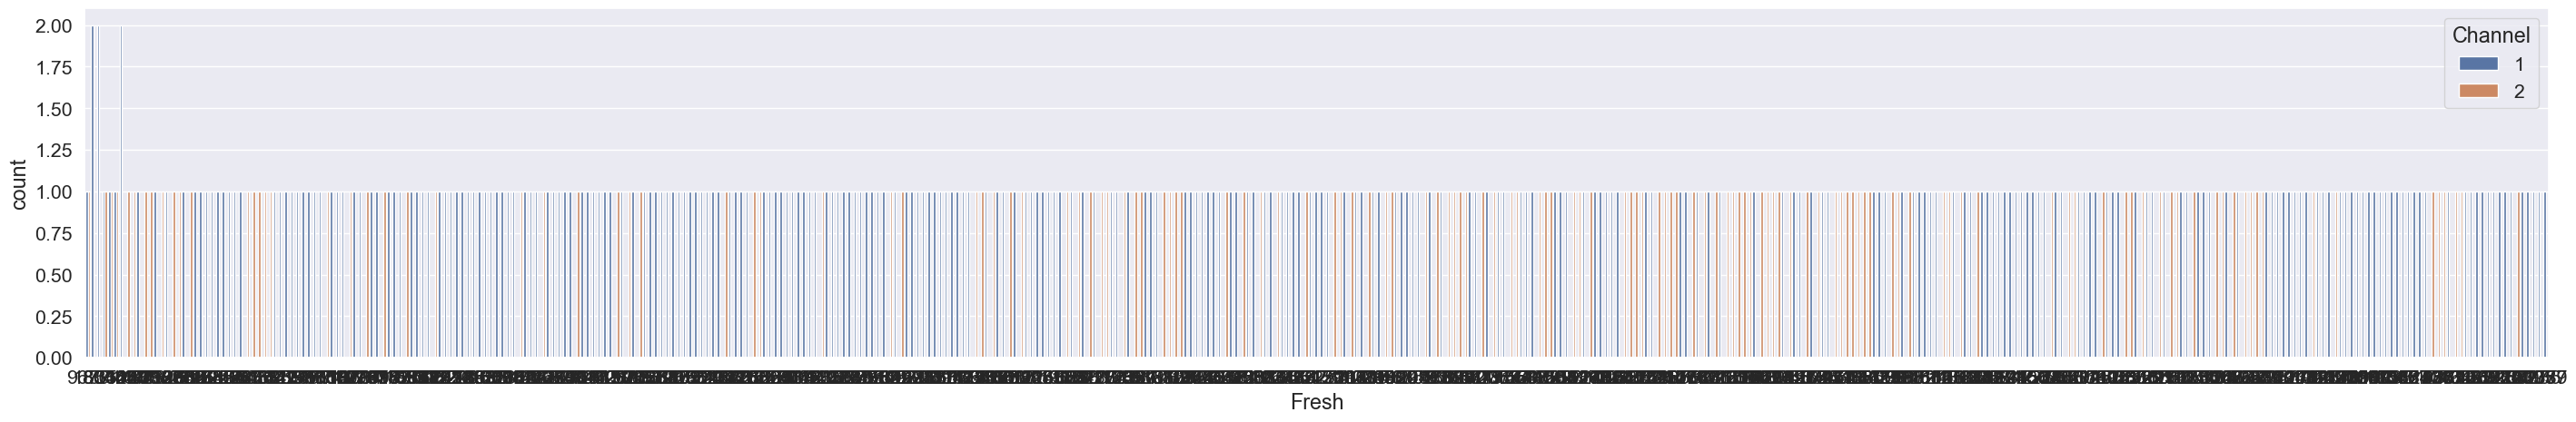

In [74]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Fresh'],order=dataset['Fresh'].value_counts().index,hue=dataset['Channel'])
plt.show()

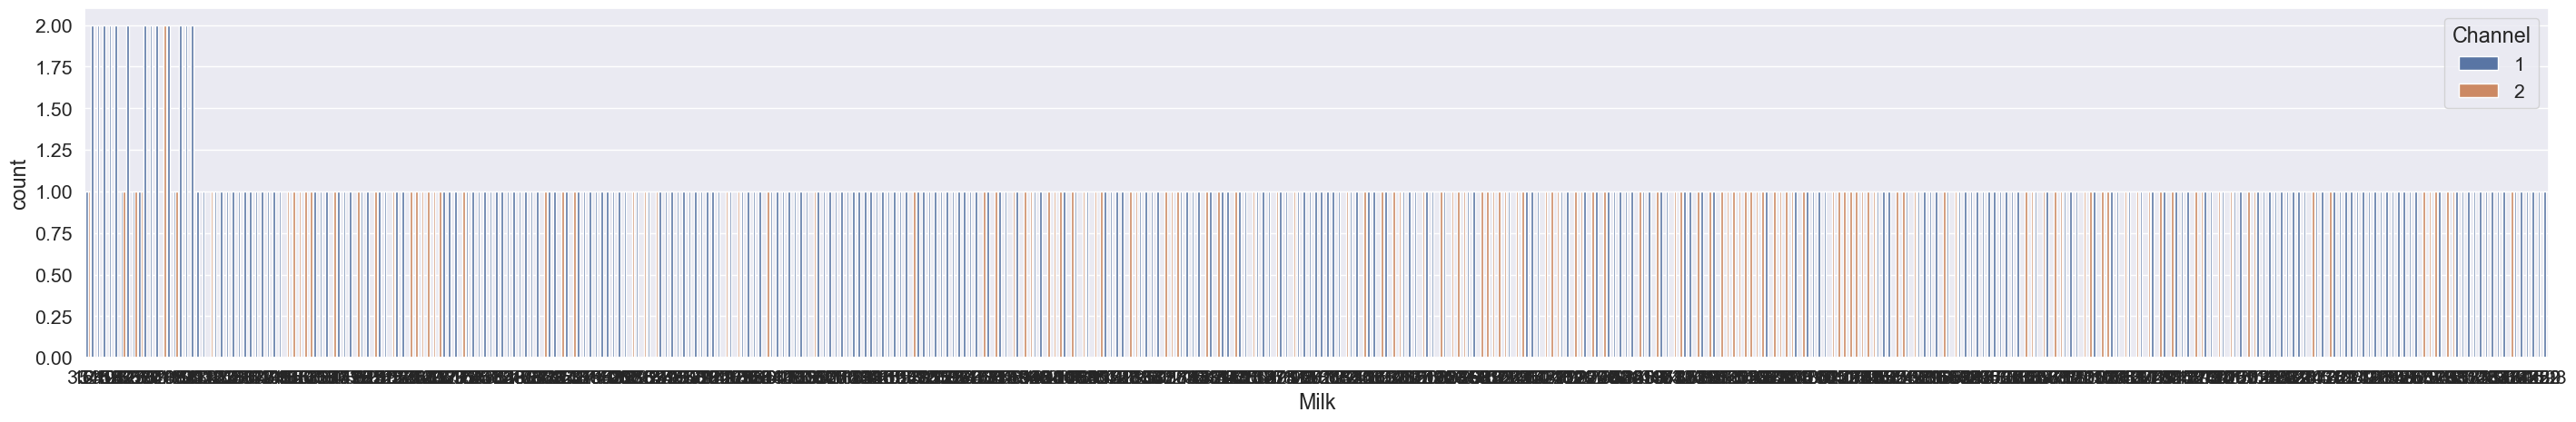

In [75]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Milk'],order=dataset['Milk'].value_counts().index,hue=dataset['Channel'])
plt.show()

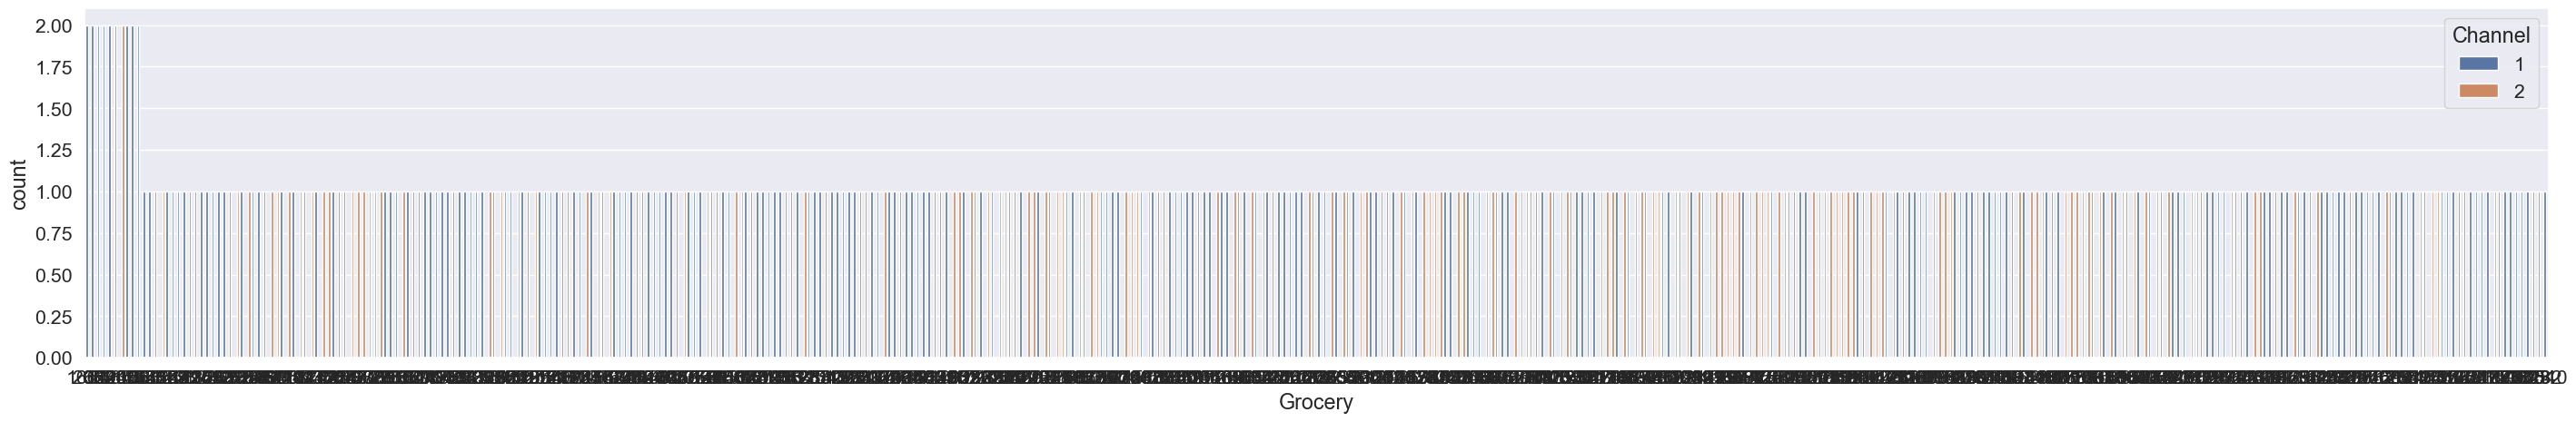

In [76]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Grocery'],order=dataset['Grocery'].value_counts().index,hue=dataset['Channel'])
plt.show()

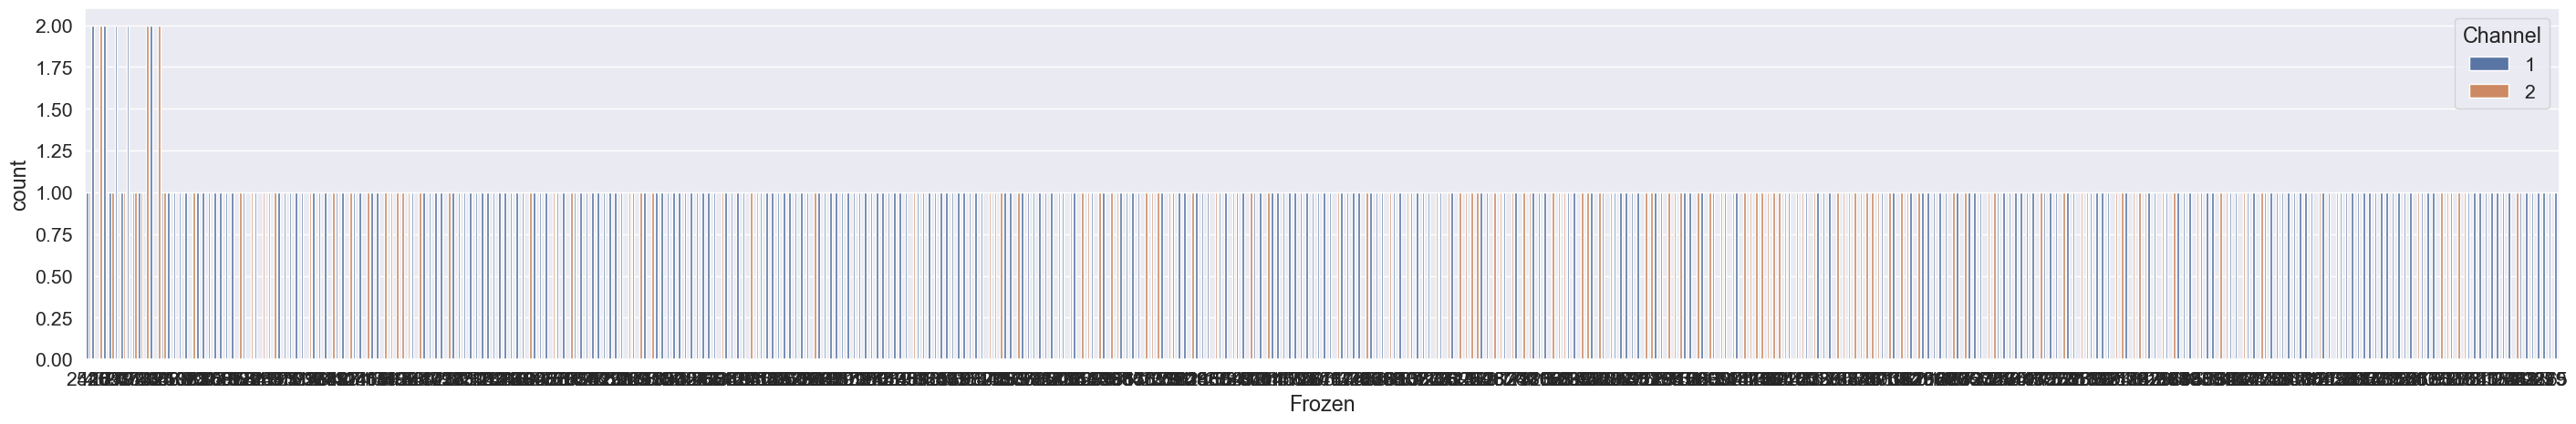

In [77]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Frozen'],order=dataset['Frozen'].value_counts().index,hue=dataset['Channel'])
plt.show()

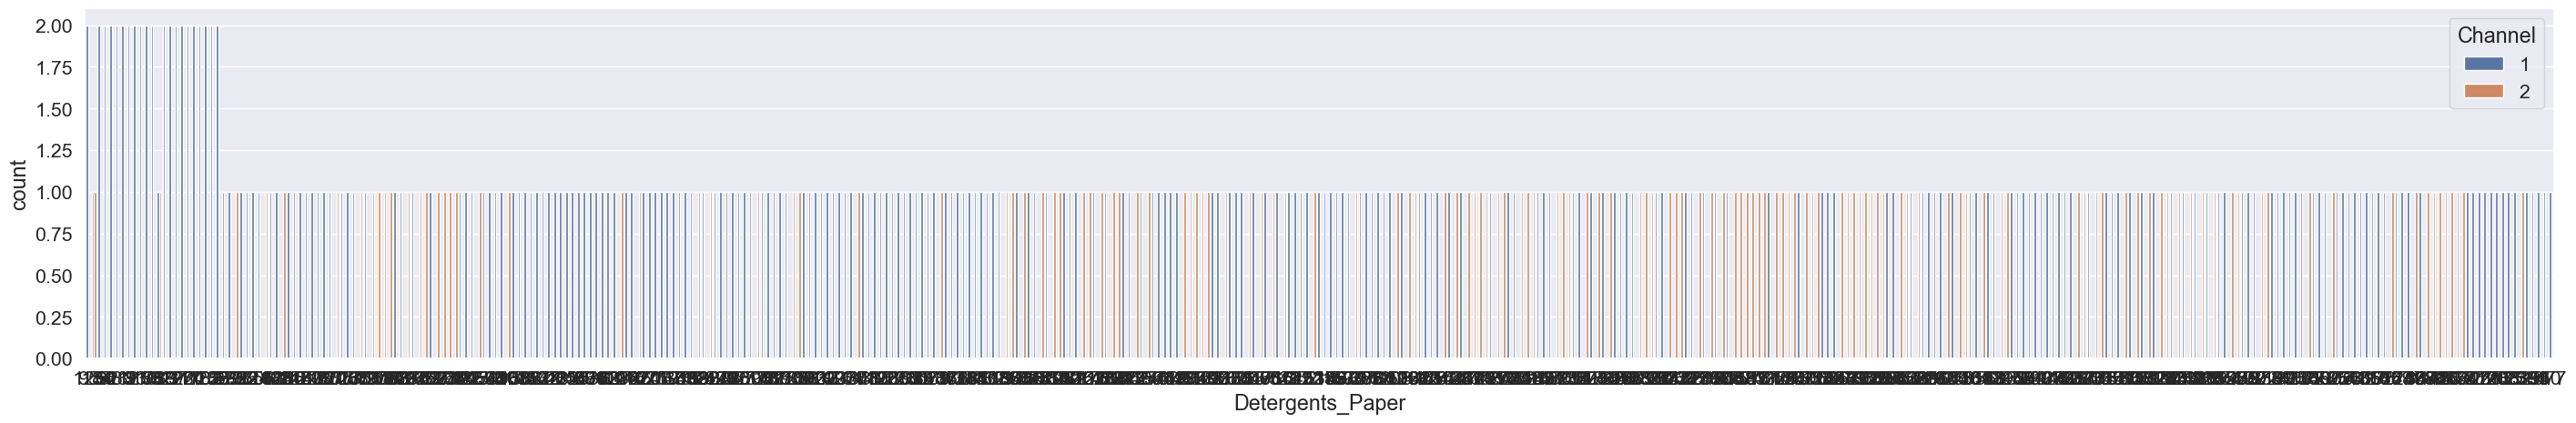

In [78]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Detergents_Paper'],order=dataset['Detergents_Paper'].value_counts().index,hue=dataset['Channel'])
plt.show()

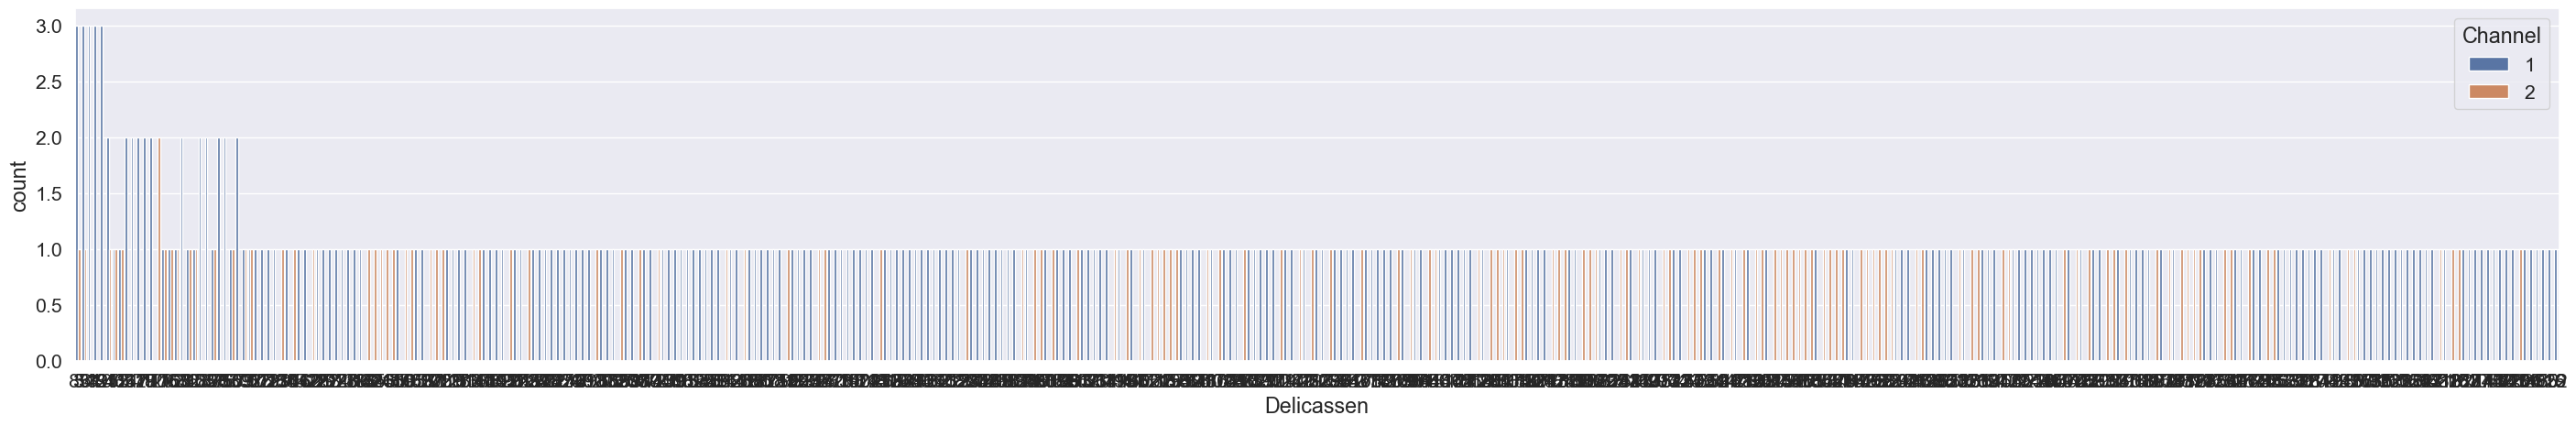

In [79]:
plt.subplots(figsize = (35,5))
sns.countplot(x=dataset['Delicassen'],order=dataset['Delicassen'].value_counts().index,hue=dataset['Channel'])
plt.show()

**Cek Korelasi Tahap 1**

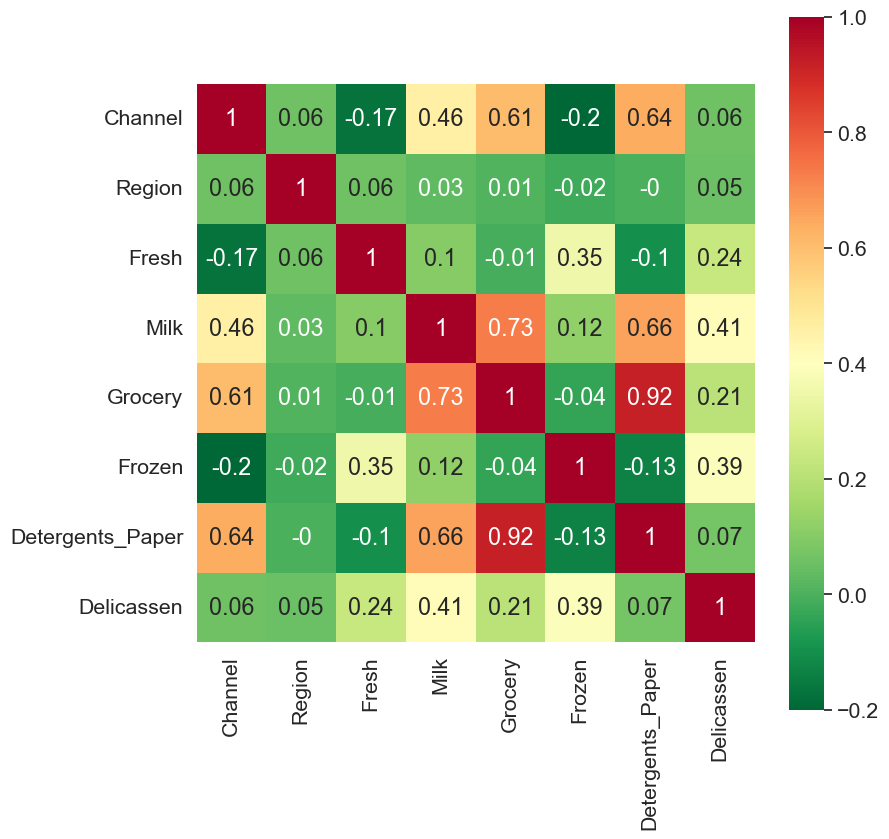

In [80]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## BAB 3 – Memvalidasi Data

temuan :
- tidak ada data ? atau missing value
- kelas hampir seimbang
- semua variable keluar

## BAB 4 – Menentukan Objek Data
generate table menggunakan https://www.tablesgenerator.com/markdown_tables

| Nama             | Distribusi |
|------------------|------------|
| Channel          | Class      |
| Region           | Atribute   |
| Fresh            | Atribute   |
| Milk             | Atribute   |
| Grocery          | Atribute   |
| Frozen           | Atribute   |
| Detergents_Paper | Atribute   |
| Delicassen       | Atribute   |

## BAB 5 – Membersihkan Data



In [13]:
dataset.replace("?", np.nan, inplace= True) #membersihkan data

In [14]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
dataset.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [16]:
dataset.isnull().values.any() #jika true = ada data yg hilang

False

temuan:  

  hasilnya adalah false, ini menandakan bahwa tidak terdapat missing value pada data
  

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


temuan:  
   semua nilai data utuh 440

## BAB 6 – Mengkontruksi Data


karena kondisi data yaitu tipe data sudah sesuai (tidak ada data object) maka dapat langsung
menghapus nilai konstan dalam data dan cek korelasi tahap ke 2

In [27]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Temuan :  
    Karena jumlah atribut masih sama-sama ada 8 artinya tidak ada data bernilai
konstan


# Cek Korelasi Tahap 2

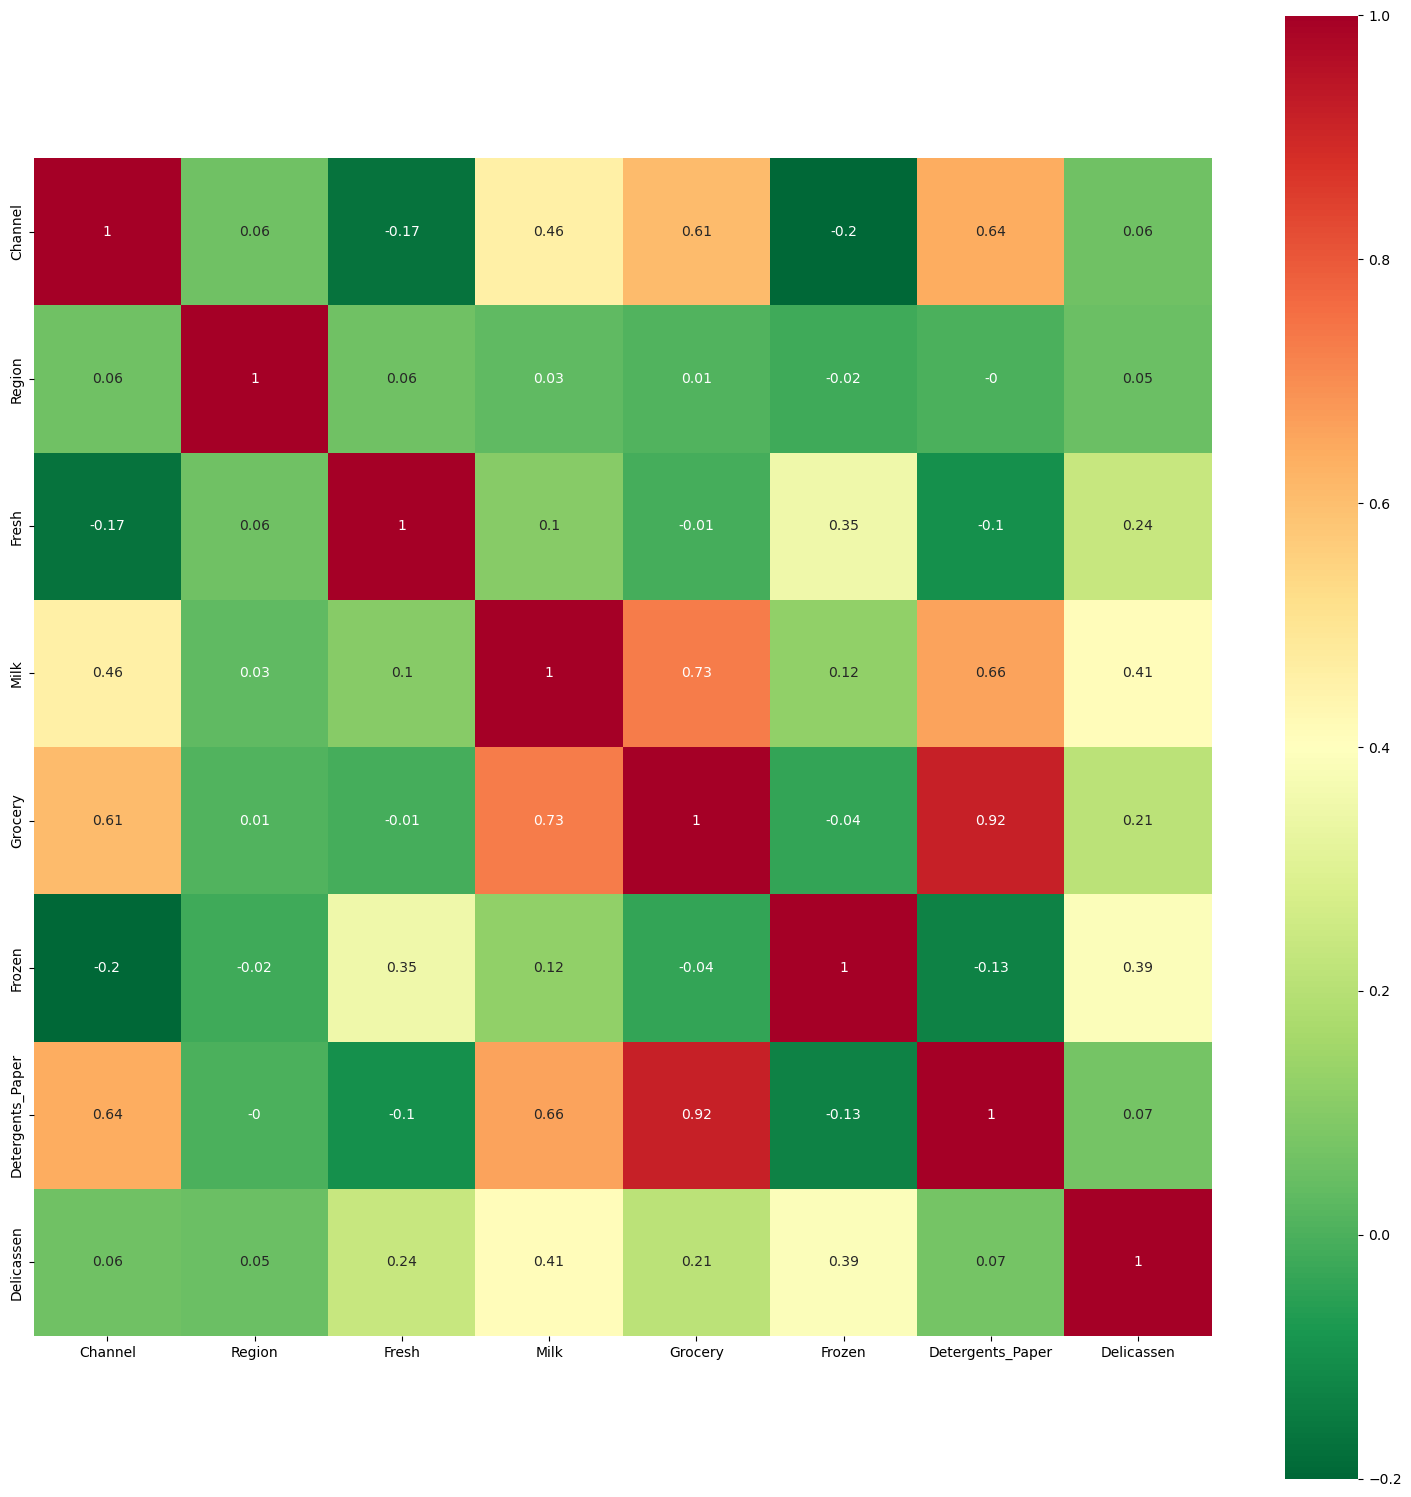

In [29]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# Cek BOXPLOT

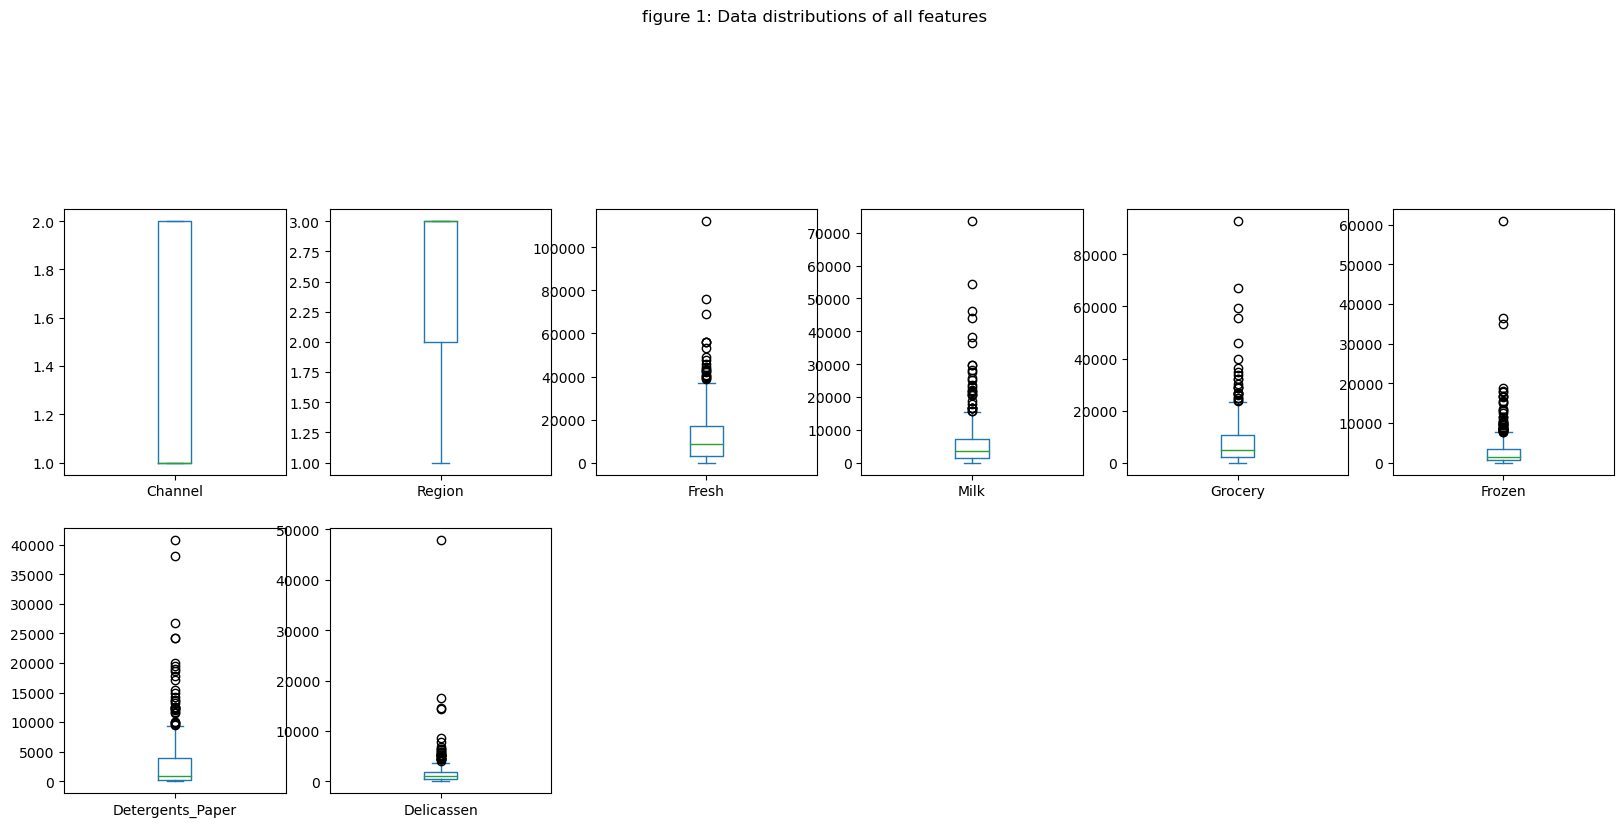

In [30]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

Temuan:   
Dapat terlihat pada box plot diatas Ada banyak outlier di Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen

## BAB 7 – Menentukan Label Data


In [33]:
y = dataset['Channel']

In [34]:
y #cek vairabel y

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

Menentukan jumlah cluster dengan metode Kmeans menggunakan perintah berikut:

In [37]:
#menentukan jumlah cluster (jumlah cluester = 2, dan metode clustering yg digunakan adalah KMeans)
km = KMeans(n_clusters=2)
#case klasterisasi
#untuk mejalankan perintah ini anda perlu periksa kembali library anda pada bab 1 untuk klasterisasi

In [38]:
km

KMeans(n_clusters=2)

C:\Users\62812\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\62812\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


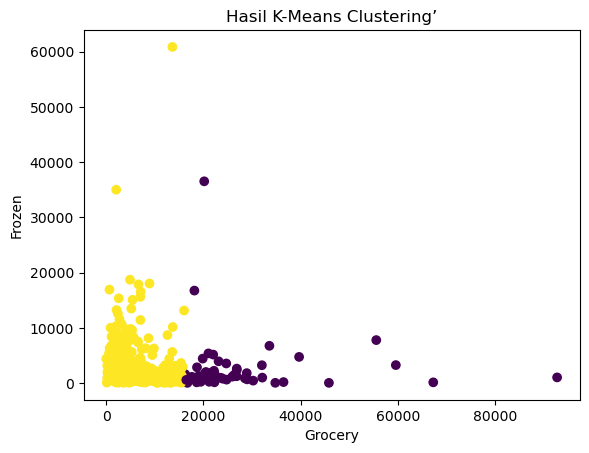

DataFrame dengan Hasil Clustering:
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen   cluster  
0          1338  diterima  
1          1776  diterima  
2   

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
features = dataset[['Grocery', 'Frozen']].values

# K-teans clustering dengan 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42) 
predicted_labels = kmeans.fit_predict(features)

# Memberikan Label "diterima” dan "ditolak” berdasarkan hasil clustering 
accepted_label = "diterima" 
rejected_label = "ditolak"
cluster_labels = {0: rejected_label, 1: accepted_label} 
predicted_labels_named = np.vectorize(cluster_labels.get)(predicted_labels)

# Menambahkan kolom hasil clustering ke dalam DataFrame 
dataset['cluster'] = predicted_labels_named

# MenampiLkan hasil clustering
plt.scatter(features[:, 0], features[:, 1], c=predicted_labels, cmap='viridis')
plt.title('Hasil K-Means Clustering’')
plt.xlabel('Grocery') 
plt.ylabel('Frozen')
plt.show()

# Menampilkan Dataframe dengan hasil clustering 
print("DataFrame dengan Hasil Clustering:")
print(dataset)

## BAB 8 – Pemodelan Data


memilih data untuk diuji, dipersiapkan dengan dilakukan Principal Component Analysis

In [7]:
X = dataset.iloc[:,2:8] #tidak menggunakan channel dan region

In [8]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [9]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2, random_state=1) 
X_pca = pca.fit_transform(X) 

print( 'Explained Variance Ratio : '  + str(pca.explained_variance_ratio_.cumsum()[1])) 

Explained Variance Ratio : 0.8647858849391102


AgglomerativeClustering dan membuat Dendrogram 

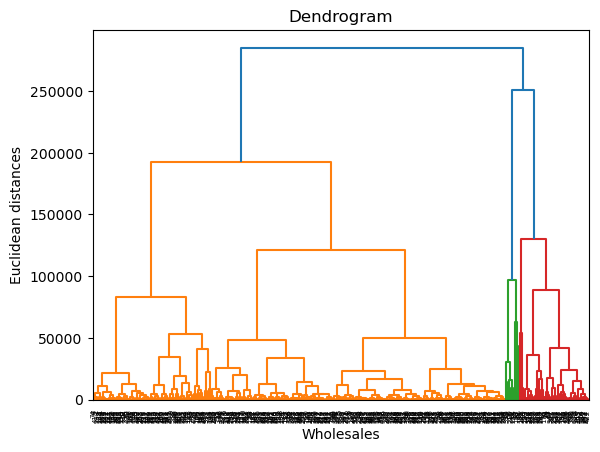

C:\Users\62812\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


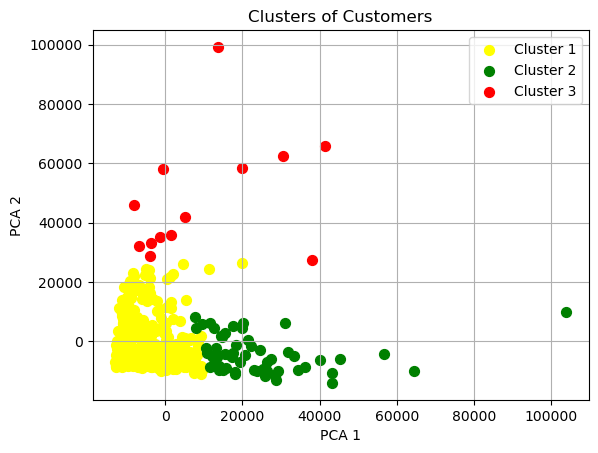

AgglomerativeClustering w/ Ward Result : 
Counter({0: 366, 1: 61, 2: 13})


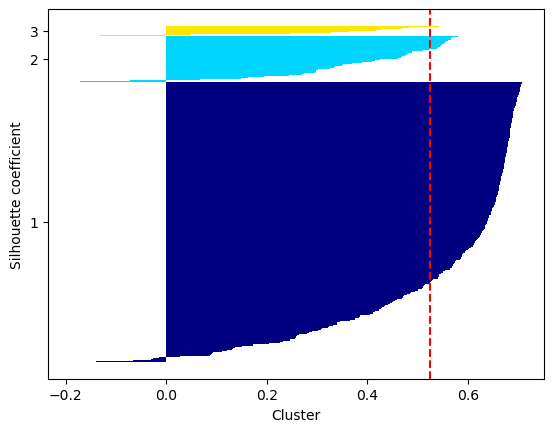

Mean of cluster 1 : 4324.214025500911, STD: 2404.090460263504
Mean of cluster 2 : 9550.251366120217, STD: 4142.643964688421
Mean of cluster 3 : 20873.512820512817, STD: 7922.250085893088


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hier
import collections
from sklearn.metrics import silhouette_samples

# Assuming X_pca is your data
dendrogram = hier.dendrogram(hier.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wholesales')
plt.ylabel('Euclidean distances')
plt.show()

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y = model.fit_predict(X_pca)

plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s=50, c='yellow', label='Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s=50, c='red', label='Cluster 3')
plt.title('Clusters of Customers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

print('AgglomerativeClustering w/ Ward Result : ')
print(collections.Counter(y))

cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.xlabel('Cluster')
plt.ylabel('Silhouette coefficient')
plt.show()

# Assuming X is your original data
y = pd.DataFrame(y, columns=['cluster'])
raw_result = pd.concat([pd.DataFrame(X), y], axis=1)

mean_1 = raw_result[raw_result['cluster'] == 0].iloc[:, 0:6].mean(axis=1)
mean_2 = raw_result[raw_result['cluster'] == 1].iloc[:, 0:6].mean(axis=1)
mean_3 = raw_result[raw_result['cluster'] == 2].iloc[:, 0:6].mean(axis=1)

print('Mean of cluster 1 : ' + str(mean_1.mean()) + ', STD: ' + str(mean_1.std()))
print('Mean of cluster 2 : ' + str(mean_2.mean()) + ', STD: ' + str(mean_2.std()))
print('Mean of cluster 3 : ' + str(mean_3.mean()) + ', STD: ' + str(mean_3.std()))


In [ ]:
from sklearn.cluster import KMeans
import collections
from sklearn.metrics import silhouette_samples
from matplotlib import cm

distortions = []
K_to_try = range(1, 10)

for i in K_to_try:
    